In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten, BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Concepts\\tensorflow_tutorials'

In [4]:
#changing directory
# os.chdir('..')
os.chdir('data/')

In [5]:
os.listdir('train/cat')

['cat.10.jpg',
 'cat.102.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1036.jpg',
 'cat.1043.jpg',
 'cat.105.jpg',
 'cat.1054.jpg',
 'cat.1075.jpg',
 'cat.1080.jpg',
 'cat.1092.jpg',
 'cat.1104.jpg',
 'cat.1105.jpg',
 'cat.1108.jpg',
 'cat.1121.jpg',
 'cat.1123.jpg',
 'cat.1125.jpg',
 'cat.1126.jpg',
 'cat.1131.jpg',
 'cat.1137.jpg',
 'cat.1156.jpg',
 'cat.1163.jpg',
 'cat.1179.jpg',
 'cat.1207.jpg',
 'cat.1208.jpg',
 'cat.1210.jpg',
 'cat.1214.jpg',
 'cat.1218.jpg',
 'cat.1220.jpg',
 'cat.1228.jpg',
 'cat.1242.jpg',
 'cat.1245.jpg',
 'cat.1252.jpg',
 'cat.1254.jpg',
 'cat.1263.jpg',
 'cat.1268.jpg',
 'cat.1276.jpg',
 'cat.1283.jpg',
 'cat.1286.jpg',
 'cat.1297.jpg',
 'cat.1308.jpg',
 'cat.1316.jpg',
 'cat.1320.jpg',
 'cat.1331.jpg',
 'cat.1337.jpg',
 'cat.1341.jpg',
 'cat.1354.jpg',
 'cat.1358.jpg',
 'cat.1363.jpg',
 'cat.1364.jpg',
 'cat.1367.jpg',
 'cat.138.jpg',
 'cat.140.jpg',
 'cat.1400.jpg',
 'cat.1404.jpg',
 'cat.1419.jpg',
 'cat.1429.jpg',
 'cat.1441.jpg',
 'cat.1444.jpg',
 'c

In [5]:
if os.path.isdir('train/cat')== False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
else:
    print('Working fine')
    

Working fine


In [8]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 '0_basic.ipynb',
 '0_basic.py',
 '1_basics.ipynb',
 '1_deep-neural-networks.ipynb',
 '2_stochastic-gradient-descent.ipynb',
 'Cats_vs_dogs.ipynb',
 'data',
 'mnist_data_neural_network.ipynb',
 'Untitled.ipynb']

In [6]:
glob.glob('cats/cat*')[:4]

['cats\\cat.1.jpg',
 'cats\\cat.100.jpg',
 'cats\\cat.1000.jpg',
 'cats\\cat.1002.jpg']

## Creating Training dataset

In [61]:
for c in random.sample(glob.glob('cats/cat*'),500):
    shutil.move(c,'train/cat/')
print(len(os.listdir('train/cat')))

500


In [76]:
print('Before Moving : ',len(os.listdir('train/dog')),'images.')
for d in random.sample(glob.glob('dogs/dog*'),500):
    shutil.move(d,'train/dog')
print('after Moving : ',len(os.listdir('train/dog')),'images.')

Before Moving :  0 images.
after Moving :  500 images.


## Creating Valid Dataset

In [77]:
print('before Moving : ',len(os.listdir('valid/cat')),'images.')
for c in random.sample(glob.glob('cats/cat*'),100):
    shutil.move(c,'valid/cat/')
print('after Moving : ',len(os.listdir('valid/cat')),'images.')

before Moving :  0 images.
after Moving :  100 images.


In [83]:
print('before Moving : ',len(os.listdir('valid/dog/')),'images.')
for c in random.sample(glob.glob('dogs/dog*'),100):
    shutil.move(c,'valid/dog/')
print('after Moving : ',len(os.listdir('valid/dog/')),'images.')

before Moving :  0 images.
after Moving :  100 images.


## Creating Test Dataset

In [84]:
print('before Moving : ',len(os.listdir('test/cat')),'images.')
for c in random.sample(glob.glob('cats/cat*'),100):
    shutil.move(c,'test/cat/')
print('after Moving : ',len(os.listdir('test/cat')),'images.')

before Moving :  0 images.
after Moving :  100 images.


In [86]:
print('before Moving : ',len(os.listdir('test/dog')),'images.')
for c in random.sample(glob.glob('cats/cat*'),100):
    shutil.move(c,'test/dog/')
print('after Moving : ',len(os.listdir('test/dog')),'images.')

before Moving :  0 images.
after Moving :  100 images.


In [7]:
train_path= 'train/'
valid_path= 'valid/'
test_path = 'test/'

In [8]:
train_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory= train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.


In [9]:
valid_batch= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory= valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 200 images belonging to 2 classes.


In [10]:
test_batch= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory= test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 200 images belonging to 2 classes.


In [12]:
train_batches.classes[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


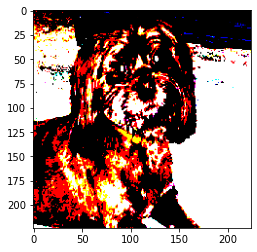

In [11]:
# ImageDataGenerator basically substract the mean of every color i.e RGB from each pixel
for img in train_batches:
    plt.imshow(img[0][0,:,:,:])
    break

In [12]:
imgs,labels= next(train_batches)

In [22]:
model= Sequential([
    Conv2D(filters= 32, kernel_size= (3,3),kernel_regularizer=keras.regularizers.l1(0.001),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [23]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
#l2 regularizer
model.fit(
    x= train_batches,
    validation_data= valid_batch,
    epochs=10,
    verbose=True
)

Epoch 1/10
100/100 [==============================] - 76s 759ms/step - loss: 39.9113 - accuracy: 0.5330 - val_loss: 0.7429 - val_accuracy: 0.5250
Epoch 2/10
100/100 [==============================] - 83s 831ms/step - loss: 0.5966 - accuracy: 0.6910 - val_loss: 0.7377 - val_accuracy: 0.6050
Epoch 3/10
100/100 [==============================] - 73s 734ms/step - loss: 0.4325 - accuracy: 0.8260 - val_loss: 0.7324 - val_accuracy: 0.6650
Epoch 4/10
100/100 [==============================] - 78s 778ms/step - loss: 0.1756 - accuracy: 0.9520 - val_loss: 0.8345 - val_accuracy: 0.6350
Epoch 5/10
100/100 [==============================] - 79s 790ms/step - loss: 0.0583 - accuracy: 0.9950 - val_loss: 1.3685 - val_accuracy: 0.5750
Epoch 6/10
100/100 [==============================] - 89s 895ms/step - loss: 0.0284 - accuracy: 0.9980 - val_loss: 1.6024 - val_accuracy: 0.5800
Epoch 7/10
100/100 [==============================] - 77s 773ms/step - loss: 0.0201 - accuracy: 0.9980 - val_loss: 1.2954 - val_a

In [24]:
#l1 regularizer
model.fit(
    x= train_batches,
    validation_data= valid_batch,
    epochs=10,
    verbose=True
)

Epoch 1/10
100/100 [==============================] - 80s 803ms/step - loss: 44.1407 - accuracy: 0.5590 - val_loss: 0.7502 - val_accuracy: 0.5450
Epoch 2/10
100/100 [==============================] - 76s 761ms/step - loss: 0.7338 - accuracy: 0.6070 - val_loss: 0.7420 - val_accuracy: 0.5500
Epoch 3/10
100/100 [==============================] - 73s 732ms/step - loss: 0.6853 - accuracy: 0.6730 - val_loss: 0.7287 - val_accuracy: 0.5850
Epoch 4/10
100/100 [==============================] - 74s 740ms/step - loss: 0.5849 - accuracy: 0.7460 - val_loss: 0.7358 - val_accuracy: 0.5550
Epoch 5/10
100/100 [==============================] - 74s 739ms/step - loss: 0.4415 - accuracy: 0.8550 - val_loss: 0.7875 - val_accuracy: 0.5850
Epoch 6/10
100/100 [==============================] - 74s 738ms/step - loss: 0.3096 - accuracy: 0.9080 - val_loss: 0.9028 - val_accuracy: 0.5800
Epoch 7/10
100/100 [==============================] - 72s 723ms/step - loss: 0.1990 - accuracy: 0.9660 - val_loss: 1.1845 - val_a

In [27]:
from tensorflow.keras.layers import Dropout

In [ ]:
Dropout(.1)